In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Q5a: Build decision tree classifier, find train/test loss

no normalisation required for decision trees

In [17]:
data_classif = pd.read_csv("/content/drive/MyDrive/w3classif.csv", header = None)

# assign features and tgt
X_classif = data_classif[[0, 1]]
y_classif = data_classif[2]

# randomly shuffle into test/train
X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(X_classif, y_classif, test_size=0.3, random_state=42)

# build decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train_classif, y_train_classif)

# pred training and test sets
y_train_pred_classif = clf.predict(X_train_classif)
y_test_pred_classif = clf.predict(X_test_classif)

# training and test misclassification rates (1 - accuracy)
train_loss = 1 - accuracy_score(y_train_classif, y_train_pred_classif)
test_loss = 1 - accuracy_score(y_test_classif, y_test_pred_classif)

print(f"Training Misclassification Rate: {train_loss * 100:.4f}%") # as a %
print(f"Testing Misclassification Rate: {test_loss * 100:.4f}%")

Training Misclassification Rate: 0.0000%
Testing Misclassification Rate: 2.5000%


Q5b: decision regions test/train

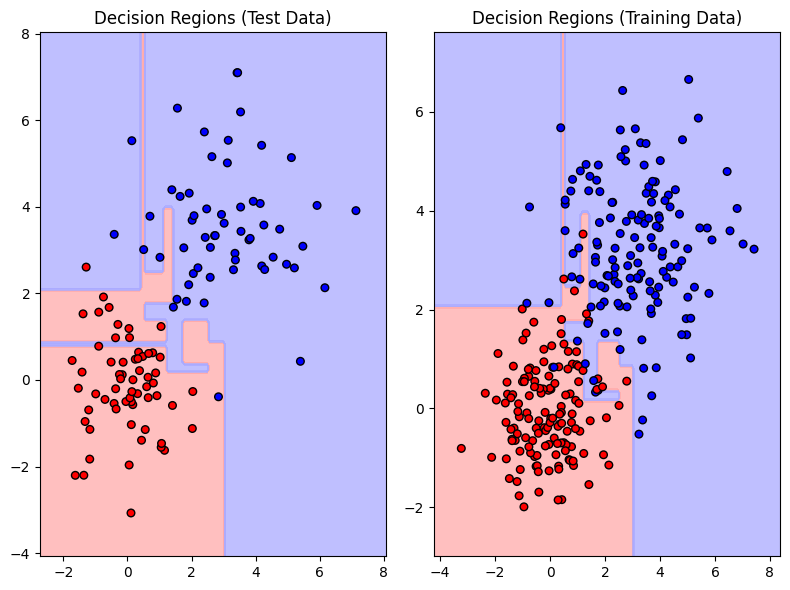

In [8]:
# plot decision regions for a classifier
def plot_decision_regions(X, y, model, ax=None):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))

# decision regions for test
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test_classif, y_test_classif, clf)
plt.title("Decision Regions (Test Data)")

# decision regions for training
plt.subplot(1, 2, 2)
plot_decision_regions(X_train_classif, y_train_classif, clf)
plt.title("Decision Regions (Training Data)")

plt.tight_layout()
plt.show()

# very discrete decision regions which is to be expected for a decision tree


Q5c: how does max depth affect decision regions

max_depth=1 -> Training Loss: 0.08214285714285718, Test Loss: 0.05833333333333335


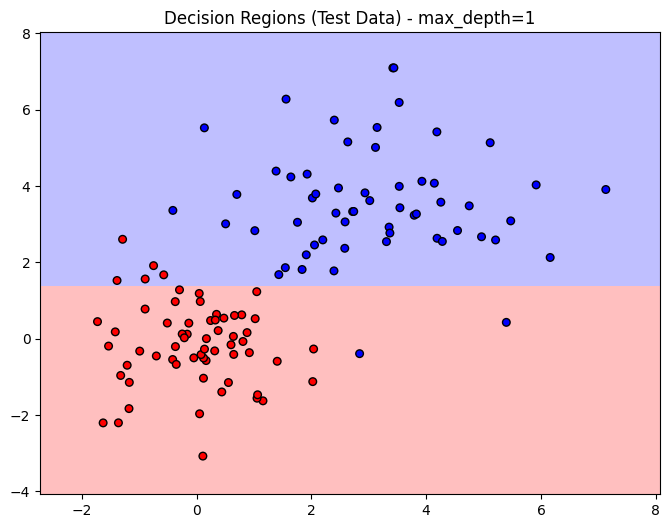

max_depth=3 -> Training Loss: 0.042857142857142816, Test Loss: 0.01666666666666672


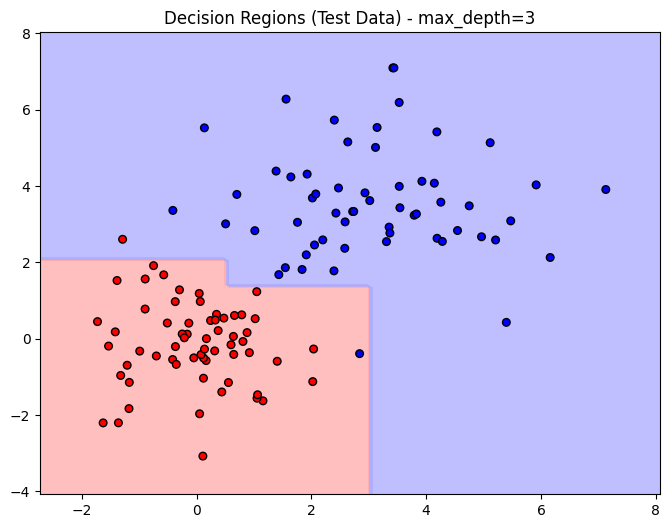

max_depth=5 -> Training Loss: 0.010714285714285676, Test Loss: 0.025000000000000022


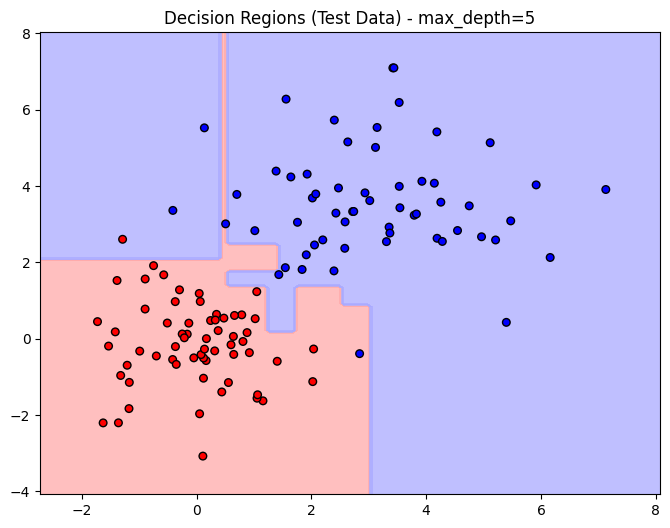

max_depth=7 -> Training Loss: 0.0, Test Loss: 0.025000000000000022


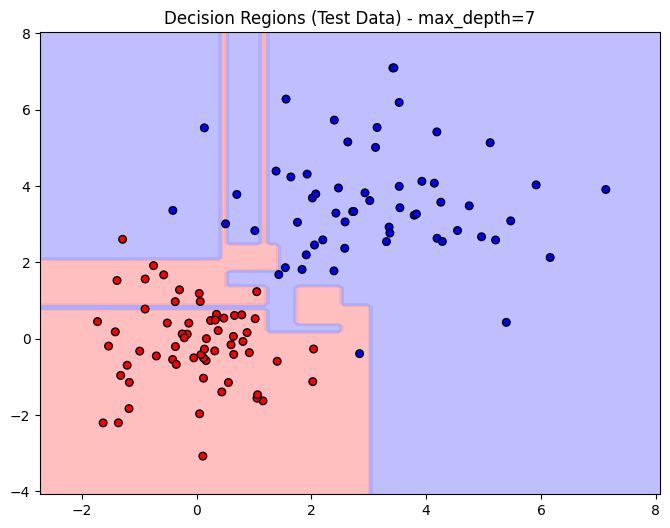

max_depth=10 -> Training Loss: 0.0, Test Loss: 0.025000000000000022


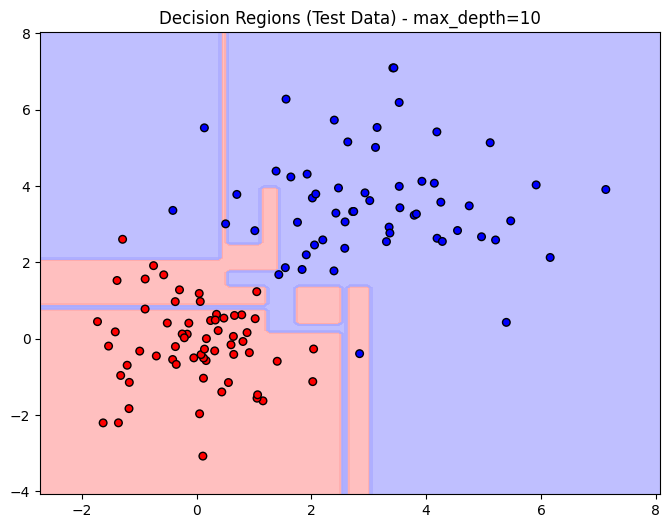

In [9]:
max_depth_values = [1, 3, 5, 7, 10]
for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train_classif, y_train_classif)

    # pred training and test sets
    y_train_pred = clf.predict(X_train_classif)
    y_test_pred = clf.predict(X_test_classif)

    # misclassif rates
    train_loss = 1 - accuracy_score(y_train_classif, y_train_pred)
    test_loss = 1 - accuracy_score(y_test_classif, y_test_pred)

    print(f"max_depth={depth} -> Training Loss: {train_loss}, Test Loss: {test_loss}")

    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_classif, y_test_classif, clf)
    plt.title(f"Decision Regions (Test Data) - max_depth={depth}")
    plt.show()

    """
    becomes more granular when depth is increased, same as knn classifiers, but captures noise too
    when depth is decreased, tree is shallow and patterns are not captured
    """

Q6a: decision tree regression model

In [14]:
data_regr = pd.read_csv("/content/drive/MyDrive/w3regr.csv", header = None)

X_regr = data_regr[[0]]
y_regr = data_regr[1]

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(X_regr, y_regr, test_size=0.3, random_state=42)

# build regression model
regr = DecisionTreeRegressor()
regr.fit(X_train_regr, y_train_regr)

y_train_pred_regr = regr.predict(X_train_regr)
y_test_pred_regr = regr.predict(X_test_regr)

# calculate sse
train_sse_regr = np.sum((y_train_regr - y_train_pred_regr)**2)
test_sse_regr = np.sum((y_test_regr - y_test_pred_regr)**2)

print(f'Training SSE: {train_sse_regr}')
print(f'Testing SSE: {test_sse_regr}')


Training SSE: 0.0
Testing SSE: 10080.180818922116


Q6b plotting train/test with pred

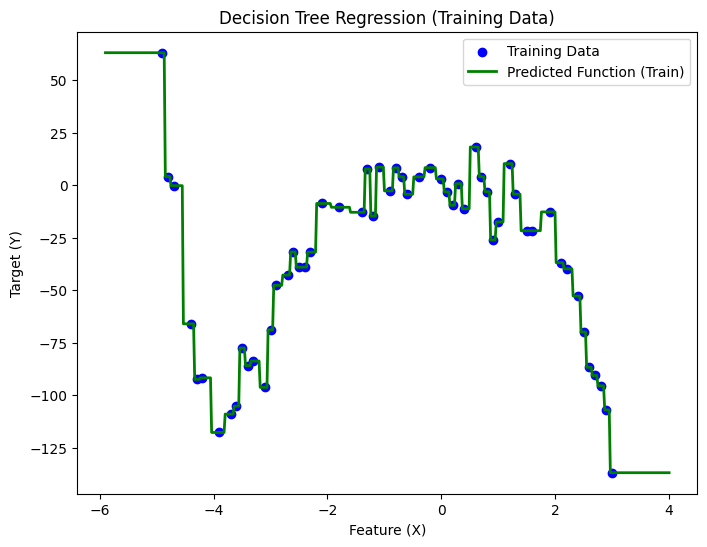

In [15]:
# meshgrid to smoothen regression line
x_min, x_max = X_train_regr.min() - 1, X_train_regr.max() + 1
xx = np.linspace(x_min, x_max, 500).reshape(-1, 1)
yy = regr.predict(xx)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_regr, y_train_regr, color='blue', label='Training Data')
plt.plot(xx, yy, color='green', label='Predicted Function (Train)', linewidth=2)
plt.title('Decision Tree Regression (Training Data)')
plt.xlabel('Feature (X)')
plt.ylabel('Target (Y)')
plt.legend()
plt.show()

Q6c testing diff maxdepth values

max_depth=1 -> Training SSE: 78726.83314165991, Test SSE: 56634.72112307967


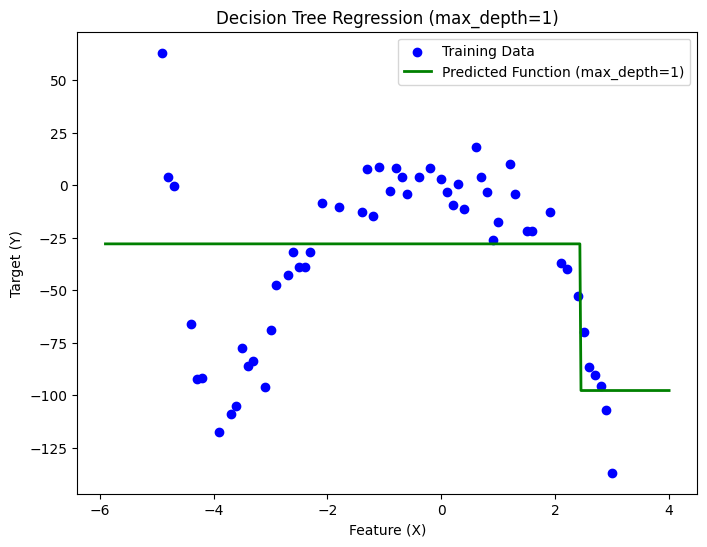

max_depth=3 -> Training SSE: 18397.181246851087, Test SSE: 22075.434749407752


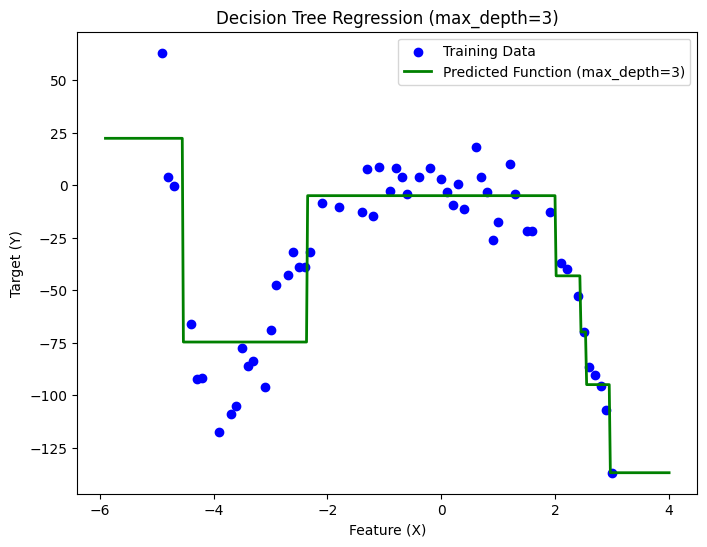

max_depth=5 -> Training SSE: 4485.9004164695125, Test SSE: 10796.442416539334


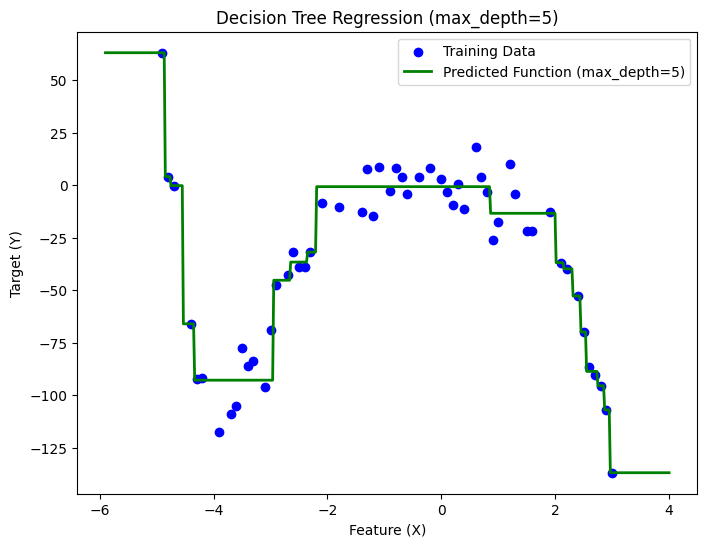

max_depth=7 -> Training SSE: 1445.3836882108126, Test SSE: 9419.704042082372


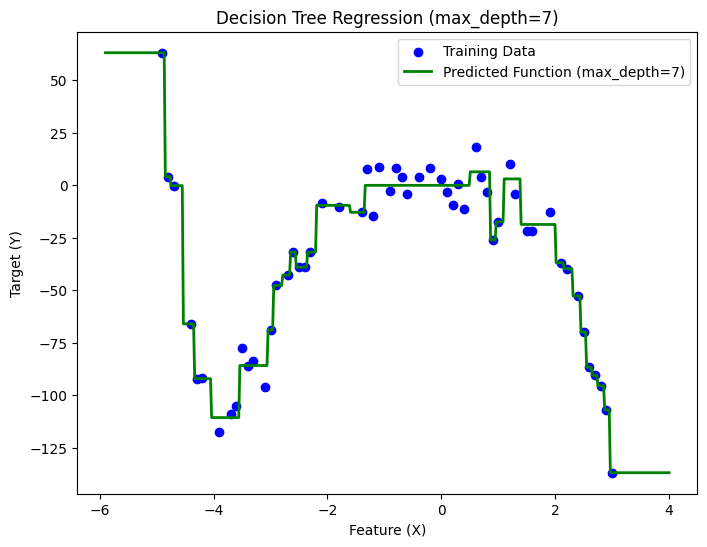

max_depth=10 -> Training SSE: 164.88095878421865, Test SSE: 10042.609384636491


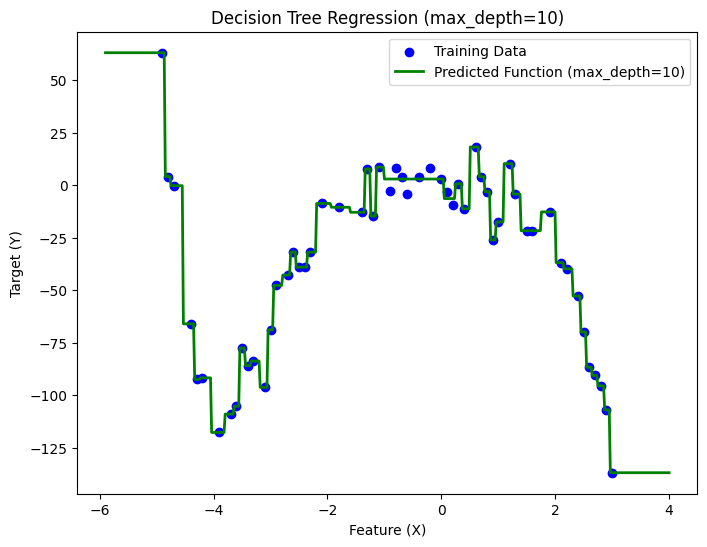

In [16]:
# try diff max depth values
max_depth_values = [1, 3, 5, 7, 10]
for depth in max_depth_values:
    regr = DecisionTreeRegressor(max_depth=depth)
    regr.fit(X_train_regr, y_train_regr)

    # pred on train and test
    y_train_pred = regr.predict(X_train_regr)
    y_test_pred = regr.predict(X_test_regr)

    # SSE
    train_sse = np.sum((y_train_regr - y_train_pred)**2)
    test_sse = np.sum((y_test_regr - y_test_pred)**2)

    print(f"max_depth={depth} -> Training SSE: {train_sse}, Test SSE: {test_sse}")

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_regr, y_train_regr, color='blue', label='Training Data')
    plt.plot(xx, regr.predict(xx), color='green', label=f'Predicted Function (max_depth={depth})', linewidth=2)
    plt.title(f'Decision Tree Regression (max_depth={depth})')
    plt.xlabel('Feature (X)')
    plt.ylabel('Target (Y)')
    plt.legend()
    plt.show()

   """
   when depth is too low, predicted function has poor generalisation and doesn't capture relationships in the data (underfit).
   when depth is too high, predicted function captures too many relationships in the data and doesn't generalise well (overfit)


   """